#  Top 1000 Global Tech Companies

>This data provides a quick overview of the leading tech companies for this 2024.They show their global rankings, key financial data, and other important information. These leading technology companies are driving progress in areas such as consumer electronics, software, semiconductors, and the equipment and materials used to make semiconductors.In addition, these data reflect the sector each company belongs to, indicating their industry focus. This helps to understand in which areas these companies are leaders.

>We will look at various aspects such as company rankings, sector and industry distribution, and country representation.
 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Loading and Exploring the Data

In [2]:
df = pd.read_csv("/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv")
df

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments


# Data Processing

>Its shows totak number of rows and columns of the dataframe.

In [3]:
df.shape

(1000, 7)

In [4]:
print(df.ndim) 

2


In [5]:
print(df.size) 

7000


In [6]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [7]:
df.dtypes

Ranking        int64
Company       object
Market Cap    object
Stock         object
Country       object
Sector        object
Industry      object
dtype: object

In [8]:
df.isna().sum()

Ranking       0
Company       0
Market Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64

In [9]:
df.duplicated().sum()

0

>This attribute provide the index of the dataframe

In [10]:
df.index

RangeIndex(start=0, stop=1000, step=1)

>Its shows the name of each columns.

In [11]:
df.columns

Index(['Ranking', 'Company', 'Market Cap', 'Stock', 'Country', 'Sector',
       'Industry'],
      dtype='object')

>Missing values ​​in dataframe

In [12]:
df.isnull()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


>Number of missing values ​​in each column

In [13]:
df.isnull().sum() ,df.isnull().sum()

(Ranking       0
 Company       0
 Market Cap    0
 Stock         0
 Country       0
 Sector        0
 Industry      0
 dtype: int64,
 Ranking       0
 Company       0
 Market Cap    0
 Stock         0
 Country       0
 Sector        0
 Industry      0
 dtype: int64)

In [14]:
df[['Country' , 'Company', 'Sector', 'Stock']]

,Country,Company,Sector,Stock
0,United States,Apple Inc.,Technology,AAPL
1,United States,Microsoft Corporation,Technology,MSFT
2,United States,Nvidia Corporation,Technology,NVDA
3,United States,Broadcom Inc.,Technology,AVGO
4,Taiwan,Taiwan Semiconductor Manufacturing Company Lim...,Technology,2330
...,...,...,...,...
995,China,"Henan Thinker Automatic Equipment Co.,Ltd.",Technology,603508
996,Japan,"transcosmos, Inc.",Technology,9715
997,China,Yeahka Ltd,Technology,9923
998,China,Beijing Wanji Technology Co. Ltd,Technology,300552


In [15]:
df.head(10)

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
5,6,"Samsung Electronics Co., Ltd.",$392.38 B,005930,South Korea,Technology,Consumer Electronics
6,7,ASML Holding N.V.,$297.10 B,ASML,Netherlands,Technology,Semiconductor Equipment & Materials
7,8,Oracle Corporation,$282.01 B,ORCL,United States,Technology,Software—Infrastructure
8,9,Adobe Inc.,$260.23 B,ADBE,United States,Technology,Software—Infrastructure
9,10,"salesforce.com, inc.",$243.78 B,CRM,United States,Technology,Software—Application


In [16]:
df.tail()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments
999,1000,Fujian Foxit Software Development Joint Stock ...,$811.5 M,688095,China,Technology,Software—Application


In [17]:
df.corr(numeric_only = True)  

,Ranking
Ranking,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [19]:
df['Stock'].unique()

array(['AAPL', 'MSFT', 'NVDA', 'AVGO', '2330', '005930', 'ASML', 'ORCL',
       'ADBE', 'CRM', 'AMD', 'ACN', 'CSCO', 'INTC', 'SAP', 'INTU', 'QCOM',
       'TXN', 'IBM', 'NOW', 'AMAT', 'UBER', '6758', '5EK', '6861', 'LRCX',
       'ADI', 'SHOP', 'MU', 'PANW', '8035', 'FI', '000660', 'KLAC',
       'INFY', 'SNPS', 'ANET', 'WDAY', 'CDNS', 'DSY', 'VMW', 'SNOW',
       'CRWD', 'APH', 'TEAM', 'NXPI', 'DELL', 'CSU', 'MSI', 'MRVL', 'IFX',
       '9MW', '2454', 'ADSK', '1810', '2317', 'MCHP', 'FTNT', 'TEL', 'SQ',
       'STM', '6981', 'ADYEN', '601138', '1QZ', 'CTSH', 'DDOG', 'FIS',
       'PLTR', 'CAP', 'ON', 'TTD', 'IT', 'HXG', 'GFS', 'ZS', 'AMS',
       '6723', 'ANSS', 'HPQ', '688981', 'CDW', 'WIPRO', 'FICO', '6702',
       'MPWR', '2382', 'MDB', 'HUBS', 'KEYS', '7751', 'GLW', '2308',
       'NET', 'SPLK', '6857', 'ASM', 'FTV', 'GIB.A', 'GRMN', '6752',
       '601012', 'BR', '6920', 'HPE', 'ERIC.A', '6971', '2303', 'TDY',
       'VRSN', 'FLT', 'PTC', '9613', 'NOKIA.SEK', 'KSPI', '6762', 'FSL

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ranking,1000.0,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0


# Data visualization

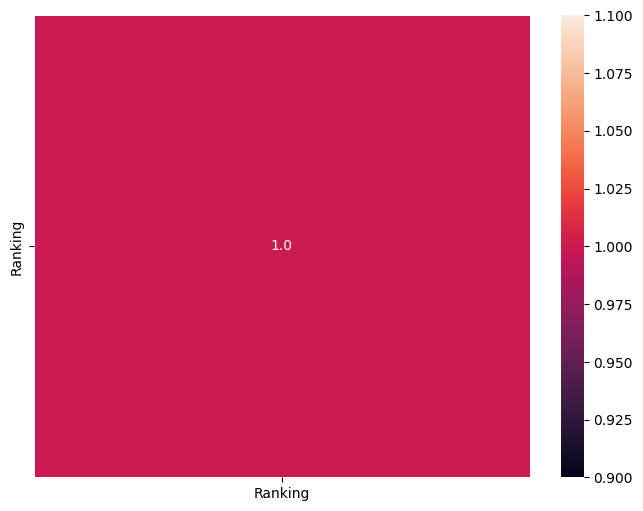

In [21]:
# visualize correlation map 
f, ax = plt.subplots(figsize =(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, fmt = '0.1f', ax=ax)
plt.show()

# Ranking the world's top companies

>Analyzing the Top 10 Companies

In [22]:
# Get the top 10 companies by Market Cap
top_10_companies = df.sort_values(by='Market Cap', ascending=False).head(10)
print(top_10_companies[['Company', 'Market Cap']])

                                 Company Market Cap
875                       Elecom Co. Ltd   $997.2 M
876          Formula Systems (1985) Ltd.   $995.0 M
877  Beijing Teamsun Technology Co.,Ltd.   $994.9 M
878                 Infinera Corporation   $993.9 M
879        Global Brands Manufacture Ltd   $989.1 M
880         Secunet Security Networks AG   $988.9 M
881                ArcherMind Technology   $986.7 M
882          Supreme Electronics Co. Ltd   $985.3 M
883                        Model N, Inc.   $982.7 M
884            ChipMOS TECHNOLOGIES INC.   $981.2 M


>the number of companies in each sector and industry

In [23]:
# Number of companies in each sector
sector_counts = df['Sector'].value_counts()
print(sector_counts)

Sector
Technology    1000
Name: count, dtype: int64


# Top 10 Companies by Market Capitalization

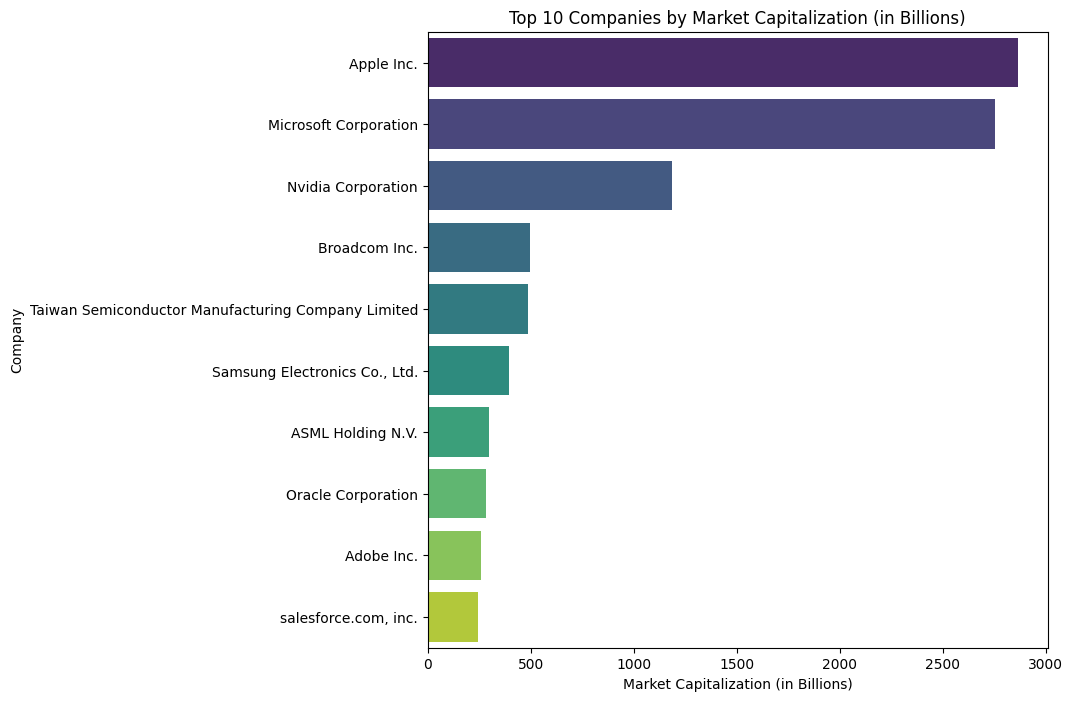

In [24]:
top_10 = df[['Company', 'Market Cap']].head(10)
top_10['Market Cap'] = top_10['Market Cap'].str.replace('$', '').str.replace(',', '')
top_10['Market Cap'] = top_10['Market Cap'].apply(lambda x: float(x.replace('T', '')) * 1e12 if 'T' in x else float(x.replace('B', '')) * 1e9)
top_10['Market Cap'] = top_10['Market Cap'] / 1e9

plt.figure(figsize=(8, 8))
sns.barplot(x='Market Cap', y='Company', data=top_10, palette='viridis')
plt.title('Top 10 Companies by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Company')
plt.show()

# Top 10 countries by the number of technology companies.

In [25]:
# Number of companies in the top 10 countries
country_counts = df['Country'].value_counts().head(10)
print(country_counts)

Country
United States     317
China             268
Taiwan            118
Japan              91
Germany            21
United Kingdom     19
Canada             18
France             17
Israel             14
Switzerland        12
Name: count, dtype: int64


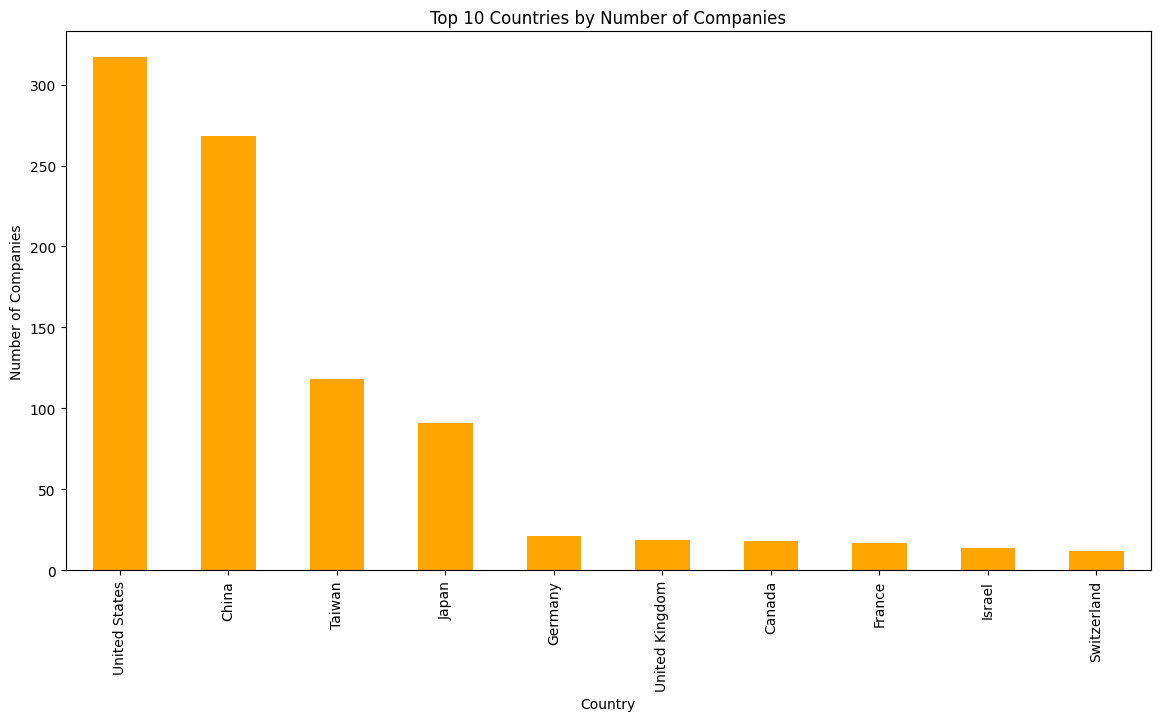

In [26]:
plt.figure(figsize=(14, 7))
df['Country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Number of Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.show()

>The chart shows which countries lead in the number of tech companies, providing a global perspective on the industry.

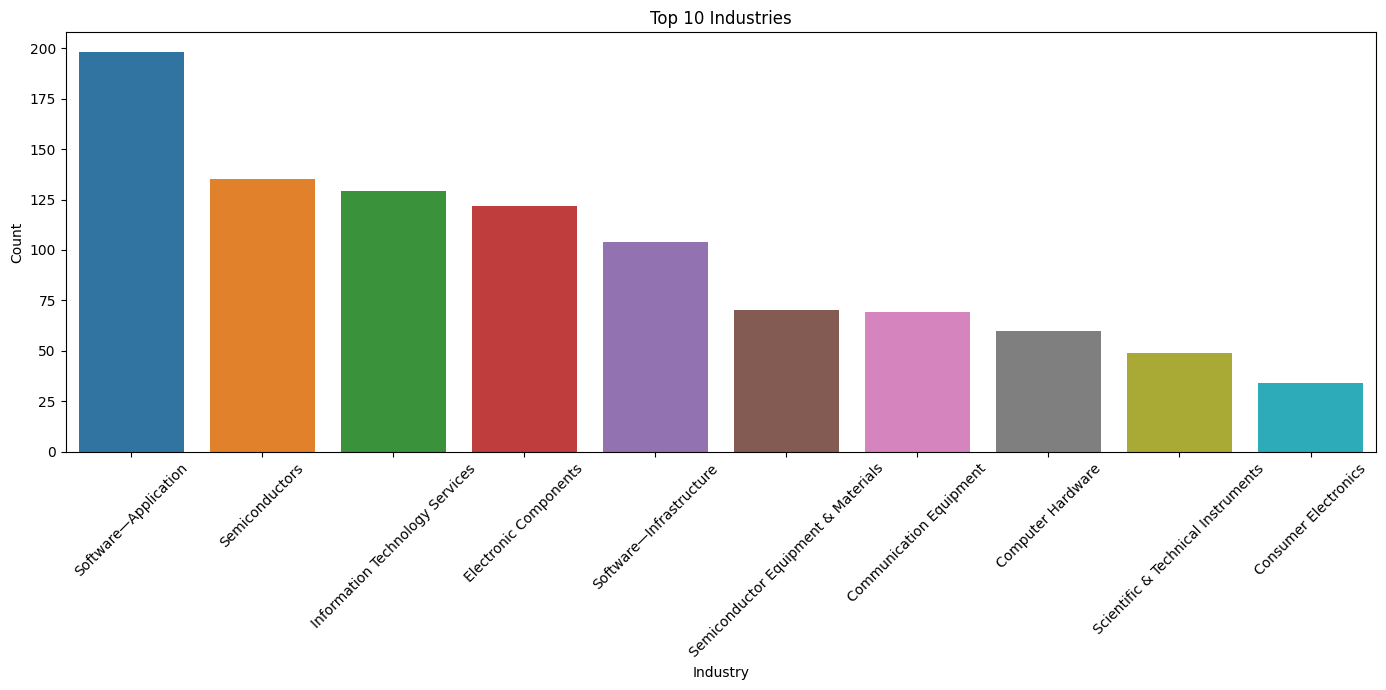

In [27]:
# Top Industries
top_industries = df['Industry'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_industries.index, y=top_industries.values)
plt.title('Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

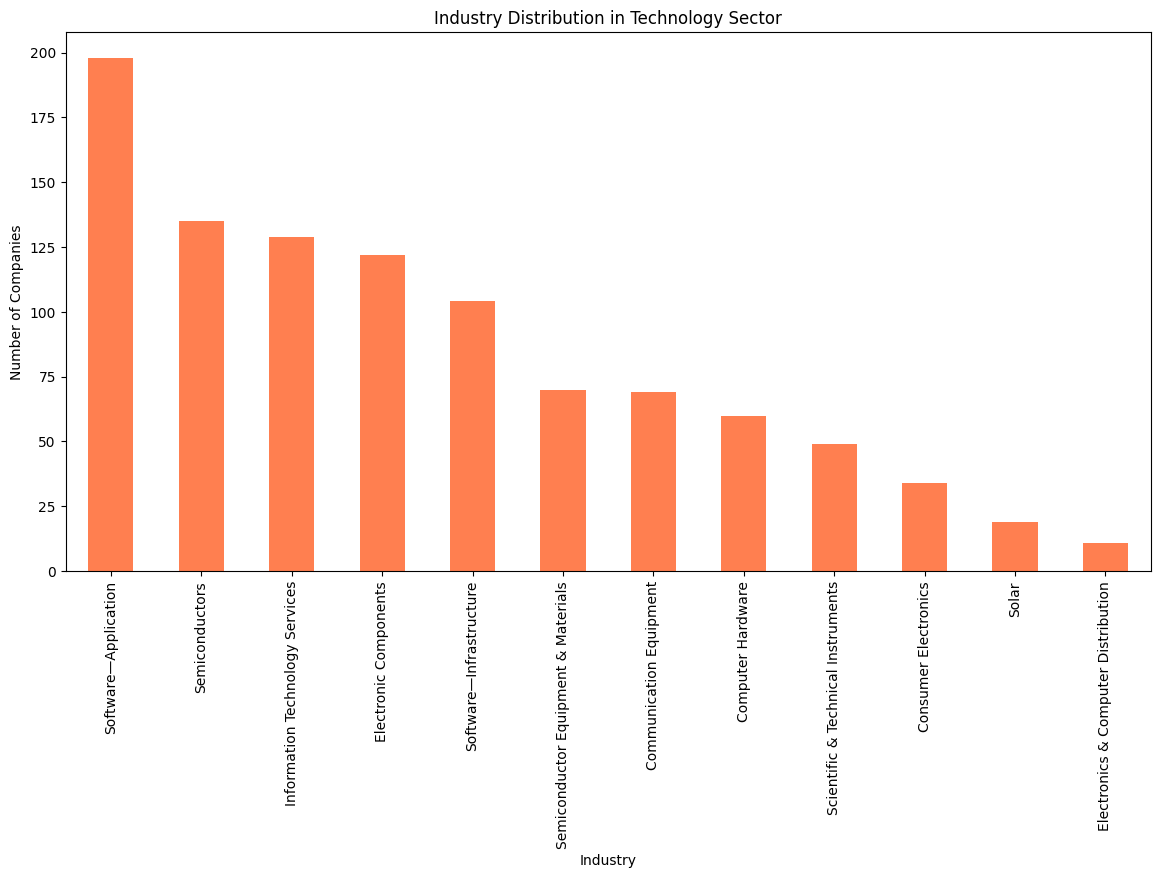

In [28]:
plt.figure(figsize=(14, 7))
tech_industries = df[df['Sector'] == 'Technology']['Industry'].value_counts()
tech_industries.plot(kind='bar', color='coral')
plt.title('Industry Distribution in Technology Sector')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

# Top 10 Companies by Ranking

In [29]:
# Displaying the top 10 companies by Ranking
top_10_ranking = df.head(10)
print(top_10_ranking[['Company', 'Market Cap', 'Sector', 'Country']])

                                             Company Market Cap      Sector  \
0                                         Apple Inc.   $2.866 T  Technology   
1                              Microsoft Corporation   $2.755 T  Technology   
2                                 Nvidia Corporation   $1.186 T  Technology   
3                                      Broadcom Inc.  $495.95 B  Technology   
4  Taiwan Semiconductor Manufacturing Company Lim...  $487.64 B  Technology   
5                      Samsung Electronics Co., Ltd.  $392.38 B  Technology   
6                                  ASML Holding N.V.  $297.10 B  Technology   
7                                 Oracle Corporation  $282.01 B  Technology   
8                                         Adobe Inc.  $260.23 B  Technology   
9                               salesforce.com, inc.  $243.78 B  Technology   

         Country  
0  United States  
1  United States  
2  United States  
3  United States  
4         Taiwan  
5    South Korea

>Detailed information about the top 10 companies, including their market capitalization, sector, and country.

# Sector Distribution Across Countries

In [30]:
# Pivot table of sectors by country
sector_country = pd.pivot_table(df, values='Company', index='Country', columns='Sector', aggfunc='count')
print(sector_country)

Sector                Technology
Country                         
Australia                     11
Austria                        2
Belgium                        4
Bermuda                        2
Brazil                         5
Canada                        18
Cayman Islands                 4
China                        268
Czechia                        1
Denmark                        4
Finland                        4
France                        17
Germany                       21
Hong Kong                      9
India                          3
Ireland                        2
Israel                        14
Italy                          5
Japan                         91
Kazakhstan                     1
Luxembourg                     1
Mauritius                      1
Netherlands                    7
New Zealand                    2
Norway                         5
Poland                         2
Portugal                       1
Singapore                      4
South Kore

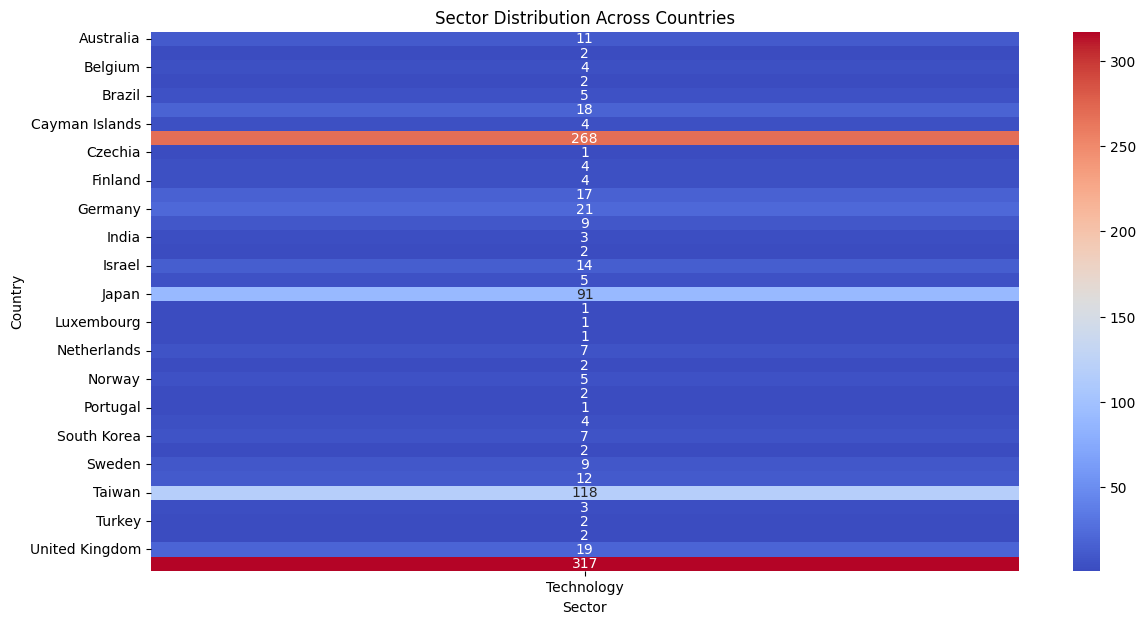

In [31]:
# Heatmap of sector distribution across countries
plt.figure(figsize=(14, 7))
sns.heatmap(sector_country, cmap='coolwarm', annot=True, fmt='d')
plt.title('Sector Distribution Across Countries')
plt.xlabel('Sector')
plt.ylabel('Country')
plt.show()

In [32]:
df

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments


In [33]:
# Interactive Scatter Plot of Valuation vs. Market Cap
fig = px.scatter(df, x='Stock', y='Market Cap', color='Industry', hover_name='Company')
fig.update_layout(title='Interactive Scatter Plot of Market Cap')
fig.show()

In [34]:
df.columns.tolist()


['Ranking', 'Company', 'Market Cap', 'Stock', 'Country', 'Sector', 'Industry']

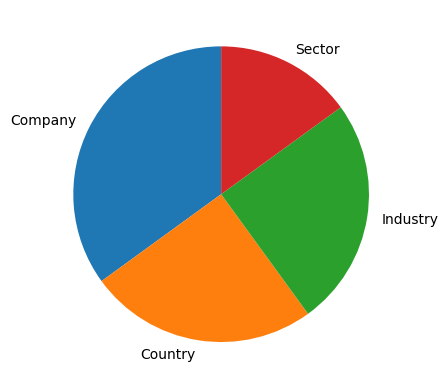

In [35]:
import matplotlib.pyplot as plt

import numpy as np

y = np.array([35, 25, 25, 15])

mylabels = ["Company", "Country", "Industry", "Sector"]



plt.pie(y, labels = mylabels, startangle = 90)

plt.show() 

In [36]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Ranking', 'Company', 'Market Cap', 'Stock', 'Country', 'Sector', 'Industry']

# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
               
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                 
                xaxis={'categoryorder': 'total descending'}
               

            )
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

>This analysis lays the groundwork for further research, including tracking trends over time or comparing the technological growth across different regions. The code snippets provided here can be easily adapted to other datasets, making this method flexible for a wide range of analyses.

We conducted an analysis of the 1,000 largest technology companies by market capitalization. Our research covered key areas such as company rankings, sector and industry distribution, and the geographic spread of these firms.